# Analysis of rainfall data, India 

#### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data into memory

In [2]:
data = pd.read_csv(r'C:\Users\knataraj\Desktop\ML\rainfall_in_india_1901-2015.csv')

### View the data

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [21]:
subdiv = data.SUBDIVISION.unique()
print(subdiv)
print(len(subdiv))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
36


### Type of values in the dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


### To check if there are any values missing

In [23]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

We can see that there are some missing values in the dataset

### Replacing missing values with the mean of the column

In [30]:
data['JAN'].fillna(data['JAN'].mean(), inplace = True)
data['FEB'].fillna(data['FEB'].mean(), inplace = True)
data['MAR'].fillna(data['MAR'].mean(), inplace = True)
data['APR'].fillna(data['APR'].mean(), inplace = True)
data['MAY'].fillna(data['MAY'].mean(), inplace = True)
data['JUN'].fillna(data['JUN'].mean(), inplace = True)
data['JUL'].fillna(data['JUL'].mean(), inplace = True)
data['AUG'].fillna(data['AUG'].mean(), inplace = True)
data['SEP'].fillna(data['SEP'].mean(), inplace = True)
data['OCT'].fillna(data['OCT'].mean(), inplace = True)
data['NOV'].fillna(data['NOV'].mean(), inplace = True)
data['DEC'].fillna(data['DEC'].mean(), inplace = True)
data['ANNUAL'].fillna(data['ANNUAL'].mean(), inplace = True)
data['Jan-Feb'].fillna(data['Jan-Feb'].mean(), inplace = True)
data['Mar-May'].fillna(data['Mar-May'].mean(), inplace = True)
data['Jun-Sep'].fillna(data['Jun-Sep'].mean(), inplace = True)
data['Oct-Dec'].fillna(data['Oct-Dec'].mean(), inplace = True)

We have replaced all the missing values with the mean of that column

In [50]:
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

## Annual rainfall in India

In [54]:
average_annual_rain = data['ANNUAL'].mean()
print('Average annual rain in India: {:.2f}'.format(average_annual_rain))

Average annual rain in India: 1411.01


## Average annual rain by year

In [55]:
average_rain_by_year = data.groupby('YEAR').mean()['ANNUAL']
average_rain_by_year

YEAR
1901    1284.214286
1902    1337.302857
1903    1400.225969
1904    1236.771429
1905    1186.177143
1906    1348.005714
1907    1298.397143
1908    1327.248571
1909    1343.464706
1910    1436.145714
1911    1259.911429
1912    1336.337143
1913    1285.960000
1914    1467.205714
1915    1348.048571
1916    1522.525247
1917    1608.628272
1918    1263.528571
1919    1493.936111
1920    1274.853025
1921    1479.100247
1922    1498.647222
1923    1378.705803
1924    1498.514136
1925    1439.530556
1926    1477.063889
1927    1480.614136
1928    1449.080803
1929    1445.089136
1930    1414.505556
           ...     
1986    1282.786111
1987    1288.555556
1988    1605.469444
1989    1347.797222
1990    1614.294444
1991    1400.219444
1992    1325.186111
1993    1430.952778
1994    1506.841667
1995    1501.061111
1996    1400.194444
1997    1416.175000
1998    1526.777778
1999    1388.022222
2000    1326.600247
2001    1302.702778
2002    1148.830556
2003    1354.463889
2004    1298.70

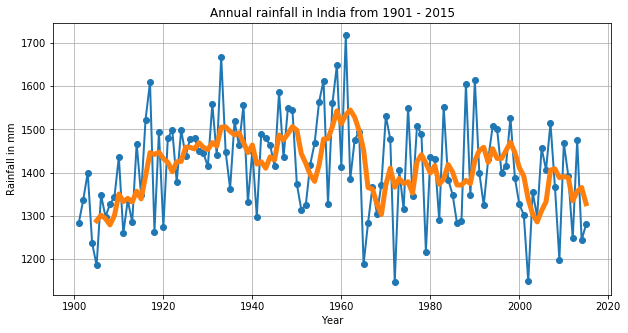

In [75]:
plt.figure(figsize=(10,5))
plt.plot(average_rain_by_year, marker = 'o', linestyle = '-', linewidth = 2)
plt.plot(average_rain_by_year.rolling(5).mean(), linewidth=5)
plt.xlabel('Year')
plt.ylabel('Rainfall in mm')
plt.title('Annual rainfall in India from 1901 - 2015')
plt.grid()

* Highest rainfall was recorded in the year 1961. 
* Lowest rainfall was recorded somewhere aroung 1970-1972

## Seasonal rainfall

In [101]:
seasonal_rain = data[['YEAR', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby('YEAR').mean()
seasonal_rain.head()

,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,,,,
1901,75.722857,137.920000,921.305714,149.262857
1902,16.814286,138.777143,1018.385714,163.334286
1903,31.197143,123.768571,1050.194286,196.294300
1904,21.077143,162.734286,933.874286,119.085714
1905,43.674286,152.128571,879.171429,111.205714


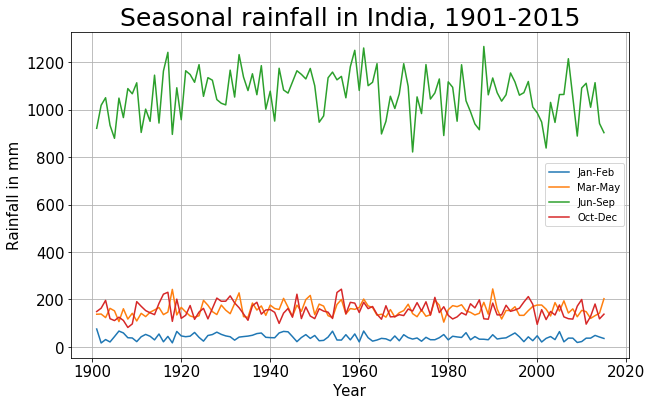

In [104]:
data[['YEAR', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby('YEAR').mean().plot(figsize=(10,6))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Rainfall in mm', fontsize= 15)
plt.title('Seasonal rainfall in India, 1901-2015', fontsize=25)
plt.tick_params(labelsize=15)
plt.grid()
plt.ioff()

Highest rainfall is recieved during Jun-Sep which is monsoon season in India

## Rainfall in subdivisions of India

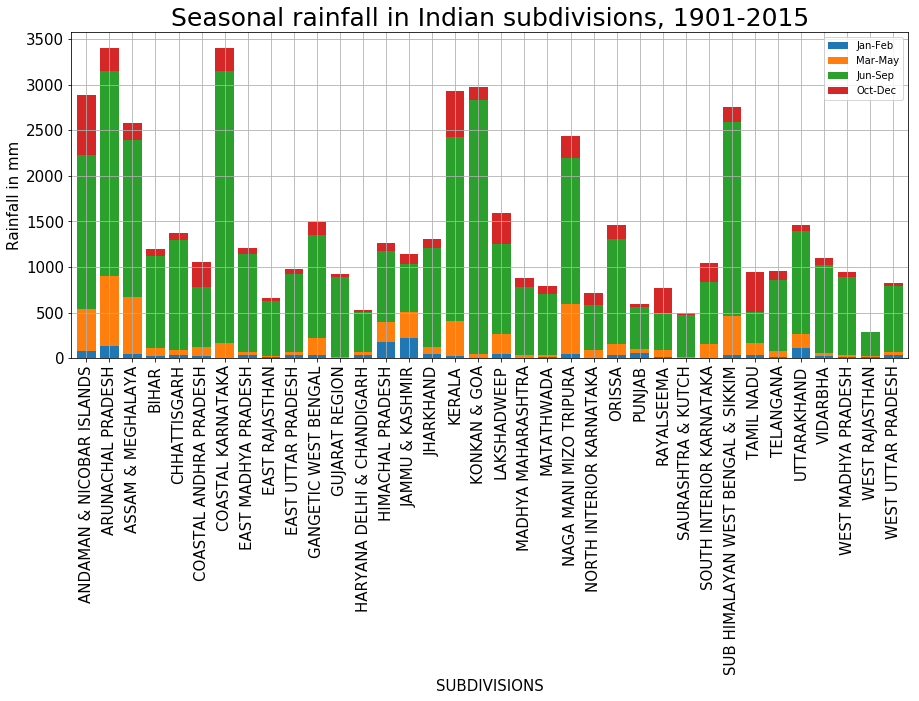

In [125]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].groupby('SUBDIVISION').mean().plot.bar(width=0.8, align='center', stacked = True, figsize=(15,6))
plt.xlabel('SUBDIVISIONS', fontsize = 15)
plt.ylabel('Rainfall in mm', fontsize= 15)
plt.title('Seasonal rainfall in Indian subdivisions, 1901-2015', fontsize=25)
plt.tick_params(labelsize=15)
plt.grid()

- Majority of rainfall is received in the month of Jun-Sep which is the Monsoon season
- Coastal Karnataka, Arunachal Pradesh, Konkan Goa and Kerala receive highest rainfall
- Rajastan, Gujarat, Haryana and Punjab receives low rainfall

## Monthly rainfall in India

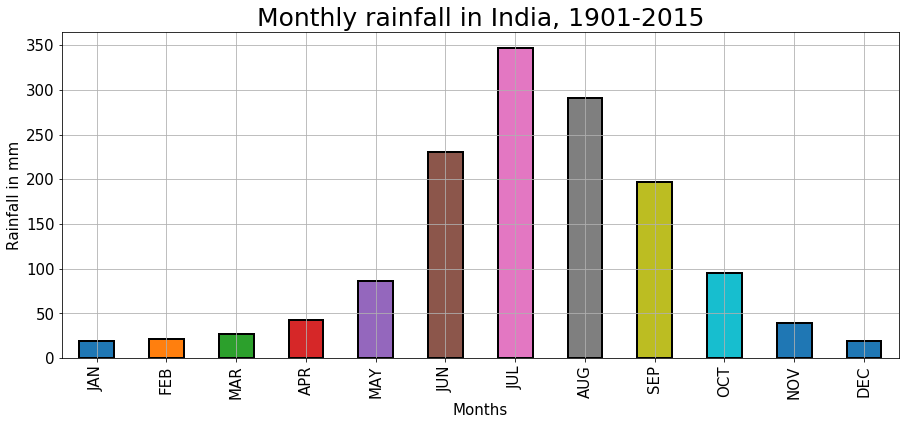

In [151]:
data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=.5, edgecolor='k', align='center', linewidth=2, figsize=(15,6))
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Rainfall in mm', fontsize= 15)
plt.title('Monthly rainfall in India, 1901-2015', fontsize=25)
plt.tick_params(labelsize=15)
plt.grid()

## Karnataka Rainfall

In [169]:
Karnataka = data[data.SUBDIVISION == 'COASTAL KARNATAKA']
Karnataka

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3542,COASTAL KARNATAKA,1901,1.80000,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,3056.9000,2.400000,144.7,2666.6,243.3
3543,COASTAL KARNATAKA,1902,3.20000,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2,3699.2000,3.500000,69.7,3262.6,363.5
3544,COASTAL KARNATAKA,1903,0.70000,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3,3317.4000,0.700000,206.9,2840.1,269.6
3545,COASTAL KARNATAKA,1904,2.40000,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0,3141.1000,2.400000,121.7,2889.1,127.9
3546,COASTAL KARNATAKA,1905,0.00000,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0,2652.3000,0.200000,89.4,2304.3,258.4
3547,COASTAL KARNATAKA,1906,23.00000,0.0,0.0,0.5,29.8,593.6,1173.4,535.0,273.3,128.5,22.1,56.8,2836.0000,23.000000,30.3,2575.2,207.5
3548,COASTAL KARNATAKA,1907,7.00000,0.0,2.7,91.3,19.0,845.9,1166.3,1026.1,223.6,87.7,55.8,9.8,3535.2000,7.000000,113.0,3261.9,153.2
3549,COASTAL KARNATAKA,1908,0.00000,3.1,0.9,46.1,38.0,708.6,1904.9,766.6,128.0,56.8,2.5,0.0,3655.5000,3.100000,85.0,3508.1,59.3
3550,COASTAL KARNATAKA,1909,4.00000,1.0,3.7,6.3,200.1,943.1,1285.6,315.6,293.8,68.8,47.8,3.2,3172.9000,5.000000,210.1,2838.1,119.8
3551,COASTAL KARNATAKA,1910,0.00000,0.0,5.0,6.2,40.2,1042.2,589.5,651.2,441.7,177.8,67.0,0.0,3020.8000,0.000000,51.4,2724.7,244.8


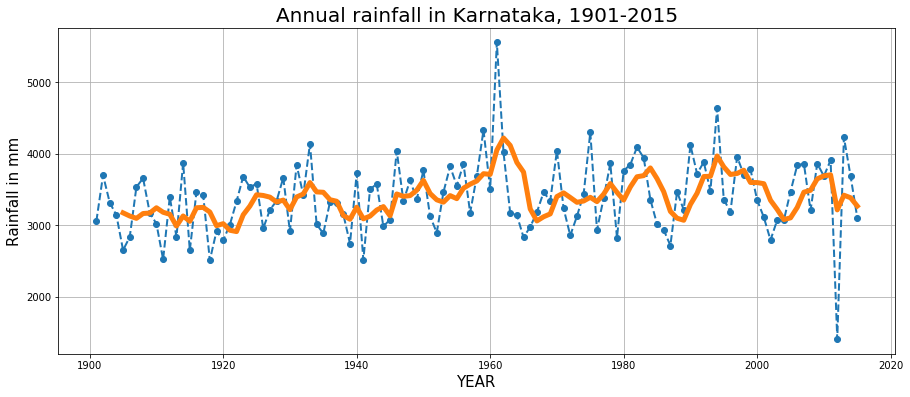

In [195]:
Karnataka_average = Karnataka.groupby('YEAR').mean()['ANNUAL']

#Karnataka_annual = Karnataka['ANNUAL'].mean()
#plt.plot(Karnataka_annual.rolling(5).mean())
plt.figure(figsize=(15,6))
plt.plot(Karnataka_average, marker = 'o', linestyle = '--', linewidth = 2)
plt.plot(Karnataka_average.rolling(5).mean(),linewidth =5)

plt.xlabel('YEAR', fontsize = 15)
plt.ylabel('Rainfall in mm', fontsize = 15)
plt.title('Annual rainfall in Karnataka, 1901-2015', fontsize=20)
plt.grid()

Coastal Karnataka has received lowest rainfall in the year 2012

In [198]:
print('Annual rainfall in Karnataka: {:.2f}'.format(Karnataka_annual))

Annual rainfall in Karnataka: 3391.04


In [210]:
KA = Karnataka[Karnataka.YEAR == 2012]

In [213]:
KA

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3653,COASTAL KARNATAKA,2012,18.95732,11.4,5.1,77.0,22.9,650.9,754.6,1027.6,382.0,115.1,68.0,3.6,1411.0089,40.747786,104.9,2815.1,186.7


2012 is the lowest rainfall year in Coastal Karnataka